In [1]:
#import findspark module for Pyspark initialization in Jupyter Notebook.
import findspark
findspark.init()
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName("appName2")
sc = SparkContext(conf=conf)

import os
import sys

# initialise sc
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, HiveContext
from pyspark.sql.types import *
sqlContext = SQLContext(sc)

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("how to read csv file").getOrCreate()

In [3]:
#Importing data
creditdata = spark.read.csv('BankChurners.csv', header=True, inferSchema=True)

In [4]:
#viewing data
creditdata.show()

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [5]:
#count of rows in dataset
creditdata.count()

10127

In [6]:
 #total number of columns in the dataset
len(creditdata.columns) 

23

In [7]:
#list of column Names
creditdata.columns

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [8]:
#data schema
creditdata.printSchema()

root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [9]:
#Checking for Null values
Nullvaluecheck = creditdata.dropna()
Nullvaluecheck.count()

10127

In [10]:
#checking for duplicated values
distinctcheck = creditdata.distinct()
print("Distinct count: "+str(distinctcheck.count()))

Distinct count: 10127


In [11]:
#libraries
import gmplot
import pixiedust
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Pixiedust database opened successfully


In [12]:
#grouping target variable by its count
credittarget =creditdata.groupby("Attrition_Flag").count().orderBy("count")
credittarget.toPandas()


,Attrition_Flag,count
0,Attrited Customer,1627
1,Existing Customer,8500


In [13]:
#Bar chart visualisation
display(credittarget)

In [ ]:
#Table Visualisation
display(credittarget)

In [15]:
#dropping unwanted columns
newcredit = creditdata.drop("CLIENTNUM",
                            "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
                            "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2")


In [16]:
 #total number of columns in the dataset
len(newcredit.columns) 

20

In [17]:
newcredit.printSchema ()

root
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (nullable = true)



In [18]:
#creating dataframe for attrited customers only
attrited= newcredit.filter(newcredit["attrition_flag"]=="Attrited Customer")
attrited.count()

1627

In [19]:
#checking the new df 
attrited.show(5)

+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+
|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|
+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+--------

### Data Exploration

In [20]:
#grouping customer attrition by education
Aeducation=attrited.groupby("Education_Level").count().orderBy("count")
Aeducation.toPandas()

,Education_Level,count
0,Post-Graduate,92
1,Doctorate,95
2,College,154
3,Uneducated,237
4,Unknown,256
5,High School,306
6,Graduate,487


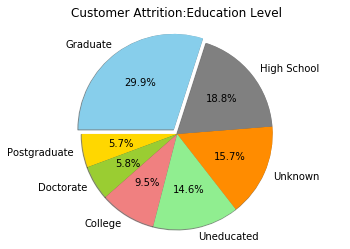

In [21]:
#Pie chart Visualisation
# Data to plot
labels = 'Postgraduate', 'Doctorate', 'College', 'Uneducated','Unknown','High School','Graduate'
sizes = [92, 95, 154, 237,256,306,487]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightgreen','darkorange','grey','skyblue']
explode = (0, 0, 0, 0,0,0,0.2)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels,colors=colors, 
autopct='%1.1f%%', shadow=True, startangle=180,radius= 3.4)

plt.title('Customer Attrition:Education Level')
plt.axis('equal')
plt.show()

In [22]:
##grouping customer attrition by gender
Agender=attrited.groupby("gender").count().orderBy("count")
Agender.toPandas()

,gender,count
0,M,697
1,F,930


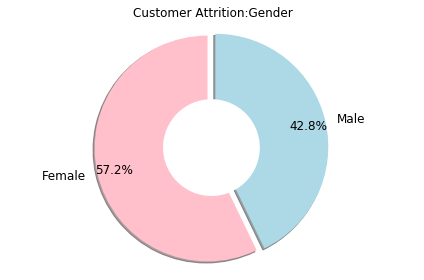

In [23]:
#Pie chart Visaualisation
#Data to plot
labels = ['Female', 'Male']
sizes = [930, 697]
colors = ['pink','lightblue']
explode = (0.05,0.05)
textprops = {"fontsize":12}

#draw circle
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

 #plot
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode,
        shadow=True, radius= 1.4, textprops= textprops)
plt.axis('equal')
plt.title("Customer Attrition:Gender")
plt.tight_layout()
plt.show()

In [24]:
#grouping cutomer attrition by maritial status
Amarital=attrited.groupby("Marital_Status").count().orderBy('count')
Amarital.toPandas()

,Marital_Status,count
0,Divorced,121
1,Unknown,129
2,Single,668
3,Married,709


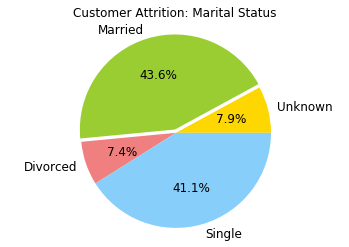

In [25]:
#Pie chart Visualisation 
#Data to plot
labels = ['Unknown', 'Married','Divorced','Single']
sizes = [129, 709, 121, 668]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.2, 0, 0)  # explode 1st slice
textprops = {"fontsize":12}


# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', 
        radius= 5.5, startangle=360, textprops= textprops)
plt.title ("Customer Attrition: Marital Status")

plt.axis('equal')
plt.show()

In [26]:
#grouping cutomer attrition by card category
Acard=attrited.groupby("Card_Category").count().orderBy('count')
Acard.toPandas()

,Card_Category,count
0,Platinum,5
1,Gold,21
2,Silver,82
3,Blue,1519


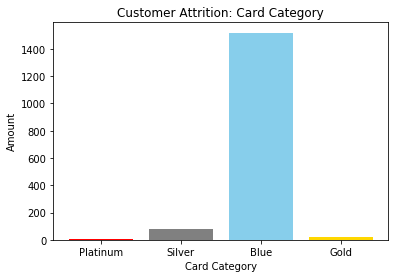

In [27]:
#Bar chart Visualisation
#Data to plot
height = [5, 82, 1519, 21]
bars = ('Platinum', 'Silver', 'Blue', 'Gold')
x = np.arange(len(bars))

# Plot
plt.bar(x, height, color=['red', 'grey', 'skyblue', 'gold'])
plt.xticks(x, bars)
plt.title ("Customer Attrition: Card Category")
plt.ylabel('Amount')
plt.xlabel('Card Category')
plt.show()

In [28]:
#grouping cutomer attrition by income category
Aincome=attrited.groupby("Income_Category").count().orderBy('count')
Aincome.toPandas()

,Income_Category,count
0,$120K +,126
1,Unknown,187
2,$60K - $80K,189
3,$80K - $120K,242
4,$40K - $60K,271
5,Less than $40K,612


In [29]:
#Bar Visualisation
display(Aincome)

In [30]:
#creating a dataframe for numerical data for attrited customer only
num_features=attrited.select('Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',\
                             'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',\
                             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio')

In [31]:
#describe numerical data for attrited customers only
num_features.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Customer_Age,1627,46.659496004917024,7.665651603482916,26,68
Dependent_count,1627,2.402581438229871,1.275010348451706,0,5
Months_on_book,1627,36.178242163491085,7.796548490955798,13,56
Total_Relationship_Count,1627,3.279655808236017,1.577781736303355,1,6
Months_Inactive_12_mon,1627,2.693300553165335,0.8996230507687535,0,6
Contacts_Count_12_mon,1627,2.972341733251383,1.090537230076184,0,6
Credit_Limit,1627,8136.03945912722,9095.334104641075,1438.3,34516.0
Total_Revolving_Bal,1627,672.8229870928088,921.3855819044372,0,2517
Avg_Open_To_Buy,1627,7463.216472034408,9109.208128933898,3.0,34516.0


In [32]:
#libraries
from pyspark.sql.functions import col, lit

In [33]:
#creating a new column agegroup
attritedagegroup= attrited.withColumn("agegroup",lit(" "))
attritedagegroup.head

<bound method DataFrame.head of DataFrame[Attrition_Flag: string, Customer_Age: int, Gender: string, Dependent_count: int, Education_Level: string, Marital_Status: string, Income_Category: string, Card_Category: string, Months_on_book: int, Total_Relationship_Count: int, Months_Inactive_12_mon: int, Contacts_Count_12_mon: int, Credit_Limit: double, Total_Revolving_Bal: int, Avg_Open_To_Buy: double, Total_Amt_Chng_Q4_Q1: double, Total_Trans_Amt: int, Total_Trans_Ct: int, Total_Ct_Chng_Q4_Q1: double, Avg_Utilization_Ratio: double, agegroup: string]>

In [34]:
#libraries
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [35]:
#Defining agegroups according to age min and max

def ValueToCategory (value):  
    if value >=26 and value <=35  :return "Group A"
    elif value >= 36 and value <=45 :return "Group B"
    elif value >=46 and value <=55 :return "Group C"
    elif value >=56 and value<= 65 :return "Group D"
    elif value >=65 :return "Group E"
    else: return 'n/a'

In [36]:
#Converting age(numeric) to category(string)
udfValueToCategory = udf(ValueToCategory, StringType())
AAG = attritedagegroup.withColumn("agegroup", udfValueToCategory("Customer_Age"))

In [37]:
#viewing the agegroup column created
AAG.head()

Row(Attrition_Flag='Attrited Customer', Customer_Age=62, Gender='F', Dependent_count=0, Education_Level='Graduate', Marital_Status='Married', Income_Category='Less than $40K', Card_Category='Blue', Months_on_book=49, Total_Relationship_Count=2, Months_Inactive_12_mon=3, Contacts_Count_12_mon=3, Credit_Limit=1438.3, Total_Revolving_Bal=0, Avg_Open_To_Buy=1438.3, Total_Amt_Chng_Q4_Q1=1.047, Total_Trans_Amt=692, Total_Trans_Ct=16, Total_Ct_Chng_Q4_Q1=0.6, Avg_Utilization_Ratio=0.0, agegroup='Group D')

In [38]:
#viewing selected columns with agegroup created
AAG.select('Attrition_Flag','Customer_Age','agegroup').show()

+-----------------+------------+--------+
|   Attrition_Flag|Customer_Age|agegroup|
+-----------------+------------+--------+
|Attrited Customer|          62| Group D|
|Attrited Customer|          66| Group E|
|Attrited Customer|          54| Group C|
|Attrited Customer|          56| Group D|
|Attrited Customer|          48| Group C|
|Attrited Customer|          55| Group C|
|Attrited Customer|          47| Group C|
|Attrited Customer|          53| Group C|
|Attrited Customer|          48| Group C|
|Attrited Customer|          59| Group D|
|Attrited Customer|          48| Group C|
|Attrited Customer|          46| Group C|
|Attrited Customer|          53| Group C|
|Attrited Customer|          68| Group E|
|Attrited Customer|          55| Group C|
|Attrited Customer|          59| Group D|
|Attrited Customer|          60| Group D|
|Attrited Customer|          52| Group C|
|Attrited Customer|          53| Group C|
|Attrited Customer|          49| Group C|
+-----------------+------------+--

In [39]:
#crosschecking all agegroups defined 
AAG.filter(AAG["agegroup"]=='n/a').count()

0

In [40]:
#grouping cutomer attrition by age group
Aagegroup=AAG.groupby("agegroup").count().orderBy('agegroup')
Aagegroup.toPandas()

,agegroup,count
0,Group A,122
1,Group B,606
2,Group C,688
3,Group D,209
4,Group E,2


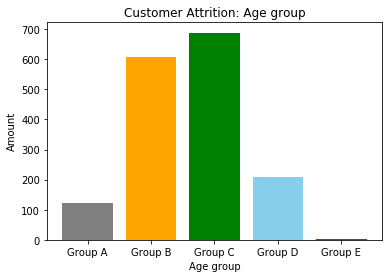

In [41]:
#Bar chart Visualisation
#Data to plot
height = [122, 606, 688,209,2]
bars = ('Group A','Group B', 'Group C', 'Group D', 'Group E')
x = np.arange(len(bars))
              
# Plot
plt.bar(x, height, color=['grey','orange','green', 'skyblue','red'])
plt.xticks(x, bars)
plt.title ("Customer Attrition: Age group")
plt.ylabel('Amount')
plt.xlabel('Age group')
plt.show()
              
              


In [42]:
#grouping dependent by their count
dependent_count=attrited.groupby("Dependent_count").count().orderBy('Dependent_count')
d2=dependent_count.toPandas()
d2

,Dependent_count,count
0,0,135
1,1,269
2,2,417
3,3,482
4,4,260
5,5,64


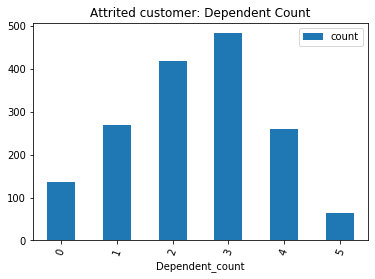

In [43]:
#bar chart for dependent count
dataFrame = pd.DataFrame(data=d2)
dataFrame.plot.bar(x="Dependent_count", y="count", rot=70, title="Attrited customer: Dependent Count");
plt.show(block=True)

In [44]:
#grouping months on book by its count
mob=attrited.groupby("Months_on_book").count().orderBy('count')
mob.toPandas()

,Months_on_book,count
0,14,1
1,16,3
2,17,4
3,55,4
4,54,6
5,19,6
6,53,7
7,13,7
8,15,9
9,21,10


In [45]:
#grouping total relationship by its count
trc=attrited.groupby("Total_Relationship_Count").count().orderBy('count')
trc.toPandas()

,Total_Relationship_Count,count
0,6,196
1,4,225
2,5,227
3,1,233
4,2,346
5,3,400


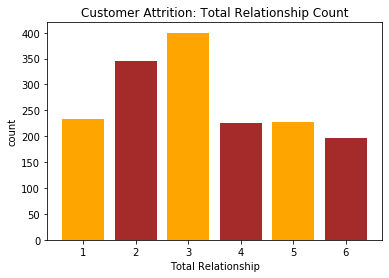

In [46]:
#bar chart 
#Data to plot
height = [233,346,400,225,227,196]
bars = (1,2,3,4,5,6)
x = np.arange(len(bars))

# Plot
plt.bar(x, height, color=['orange','brown'])
plt.xticks(x, bars)
plt.title ("Customer Attrition: Total Relationship Count")
plt.ylabel('count')
plt.xlabel('Total Relationship')
plt.show()

In [47]:
#grouping contact count
cc=attrited.groupby("Contacts_Count_12_mon").count().orderBy('count')
cc_=cc.toPandas()
cc_= cc_.set_index ('Contacts_Count_12_mon') 
cc_

,count
Contacts_Count_12_mon,
0,7
6,54
5,59
1,108
4,315
2,403
3,681


In [48]:
#grouping months inactive
ma=attrited.groupby("Months_Inactive_12_mon").count().orderBy('count')
ma_=ma.toPandas()
ma_= ma_.set_index ('Months_Inactive_12_mon') 
ma_

,count
Months_Inactive_12_mon,
0,15
6,19
5,32
1,100
4,130
2,505
3,826


In [49]:
#grouping months inactive, contact count  
AAG.groupby("Months_Inactive_12_mon","Contacts_Count_12_mon").count().orderBy("Contacts_Count_12_mon").toPandas()

,Months_Inactive_12_mon,Contacts_Count_12_mon,count
0,2,0,1
1,3,0,6
2,6,1,1
3,3,1,60
4,1,1,6
5,2,1,31
6,5,1,3
7,4,1,7
8,2,2,131
9,1,2,26


In [50]:
#dataframe for complete dataset numerical values 
num_featuresA=newcredit.select('Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',\
                            'Months_Inactive_12_mon',)
num_featuresA=num_featuresA.toPandas() 

num_featuresB=newcredit.select( 'Credit_Limit','Total_Revolving_Bal','Contacts_Count_12_mon','Avg_Open_To_Buy')
num_featuresB=num_featuresB.toPandas() 

num_featuresC=newcredit.select('Total_Amt_Chng_Q4_Q1',\
                             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio')
num_featuresC=num_featuresC.toPandas() 



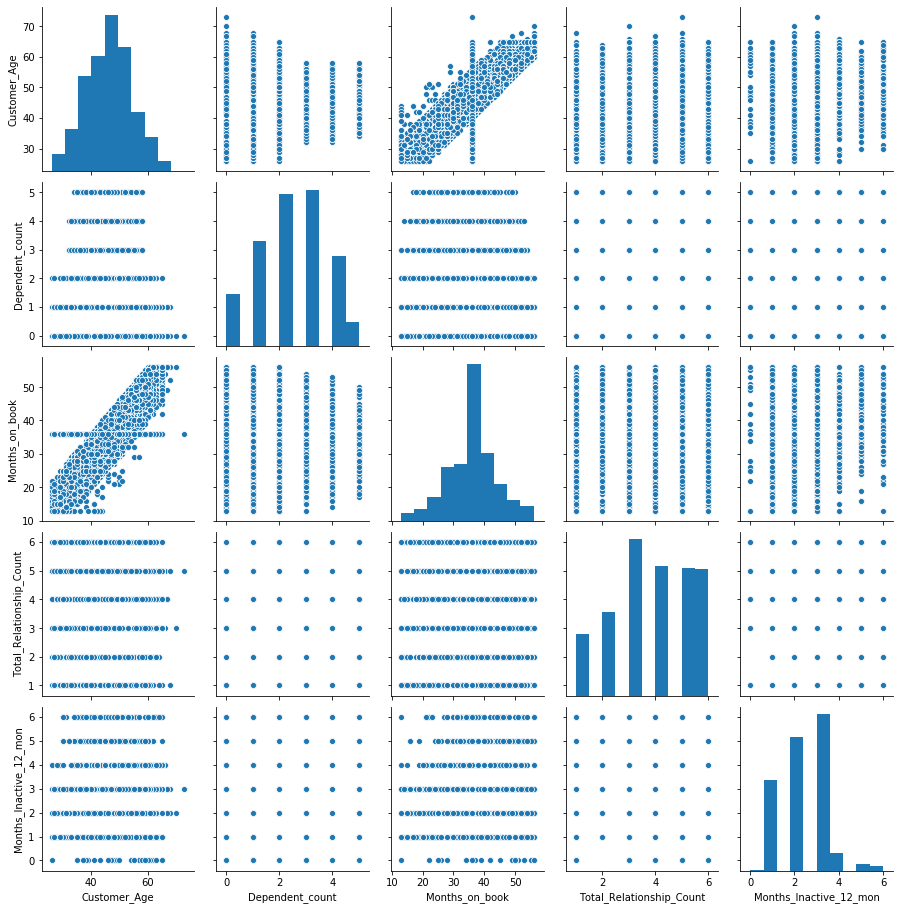

In [51]:
#visualisations for numerical value distribution
sns.pairplot(num_featuresA)

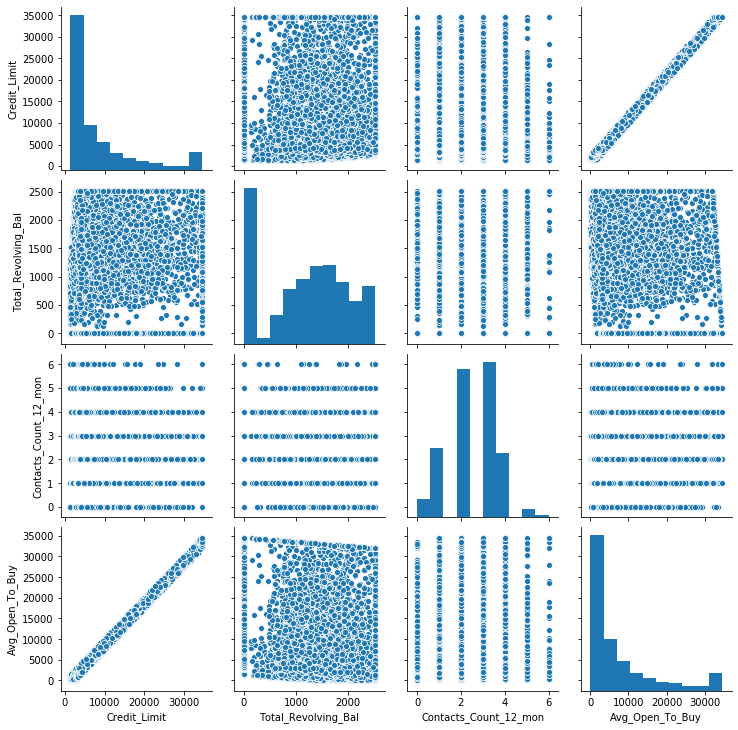

In [52]:
#visualisations for numerical value distribution
sns.pairplot(num_featuresB)

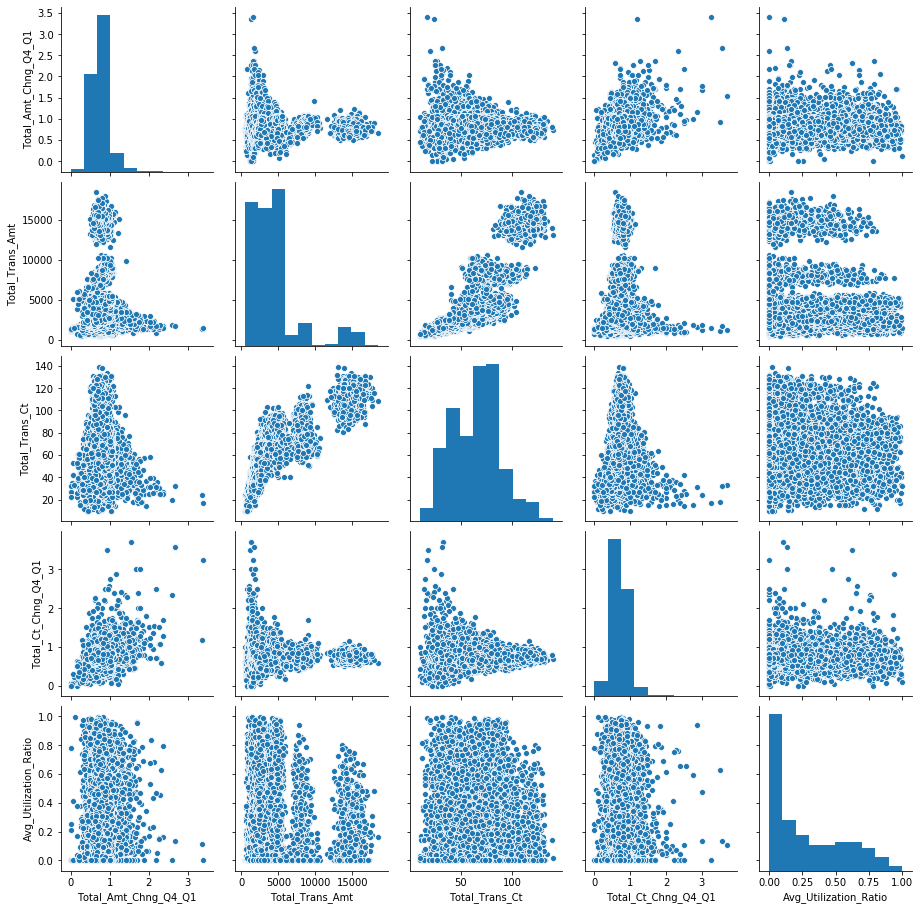

In [53]:
#visualisations for numerical value distribution
sns.pairplot(num_featuresC)

### Feature Selection

In [54]:
##libraries
import pandas as pd
import seaborn as sns


In [55]:
#converting df to pandas
newcreditP2 = newcredit.toPandas()

In [56]:
#viewing pandas df 
newcreditP2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [57]:
#libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)

In [58]:
#Encoding the categorical value
label_encoder = LabelEncoder()
newcreditP2.loc[:,['Attrition_Flag','Gender','Education_Level',
                    'Marital_Status','Income_Category','Card_Category']]=\
newcreditP2.loc[:,['Attrition_Flag','Gender','Education_Level',
                    'Marital_Status','Income_Category','Card_Category']]\
                .apply(label_encoder.fit_transform)

In [59]:
#crosschecking encoded column
newcreditP2

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,1,2,2,2,1,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,1,2,6,0,1,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,0,1,3,1,4,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,1,2,2,3,1,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [60]:
#identifying the encoder values. 1=existing and 0 =attrited
newcreditP2.Attrition_Flag.value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

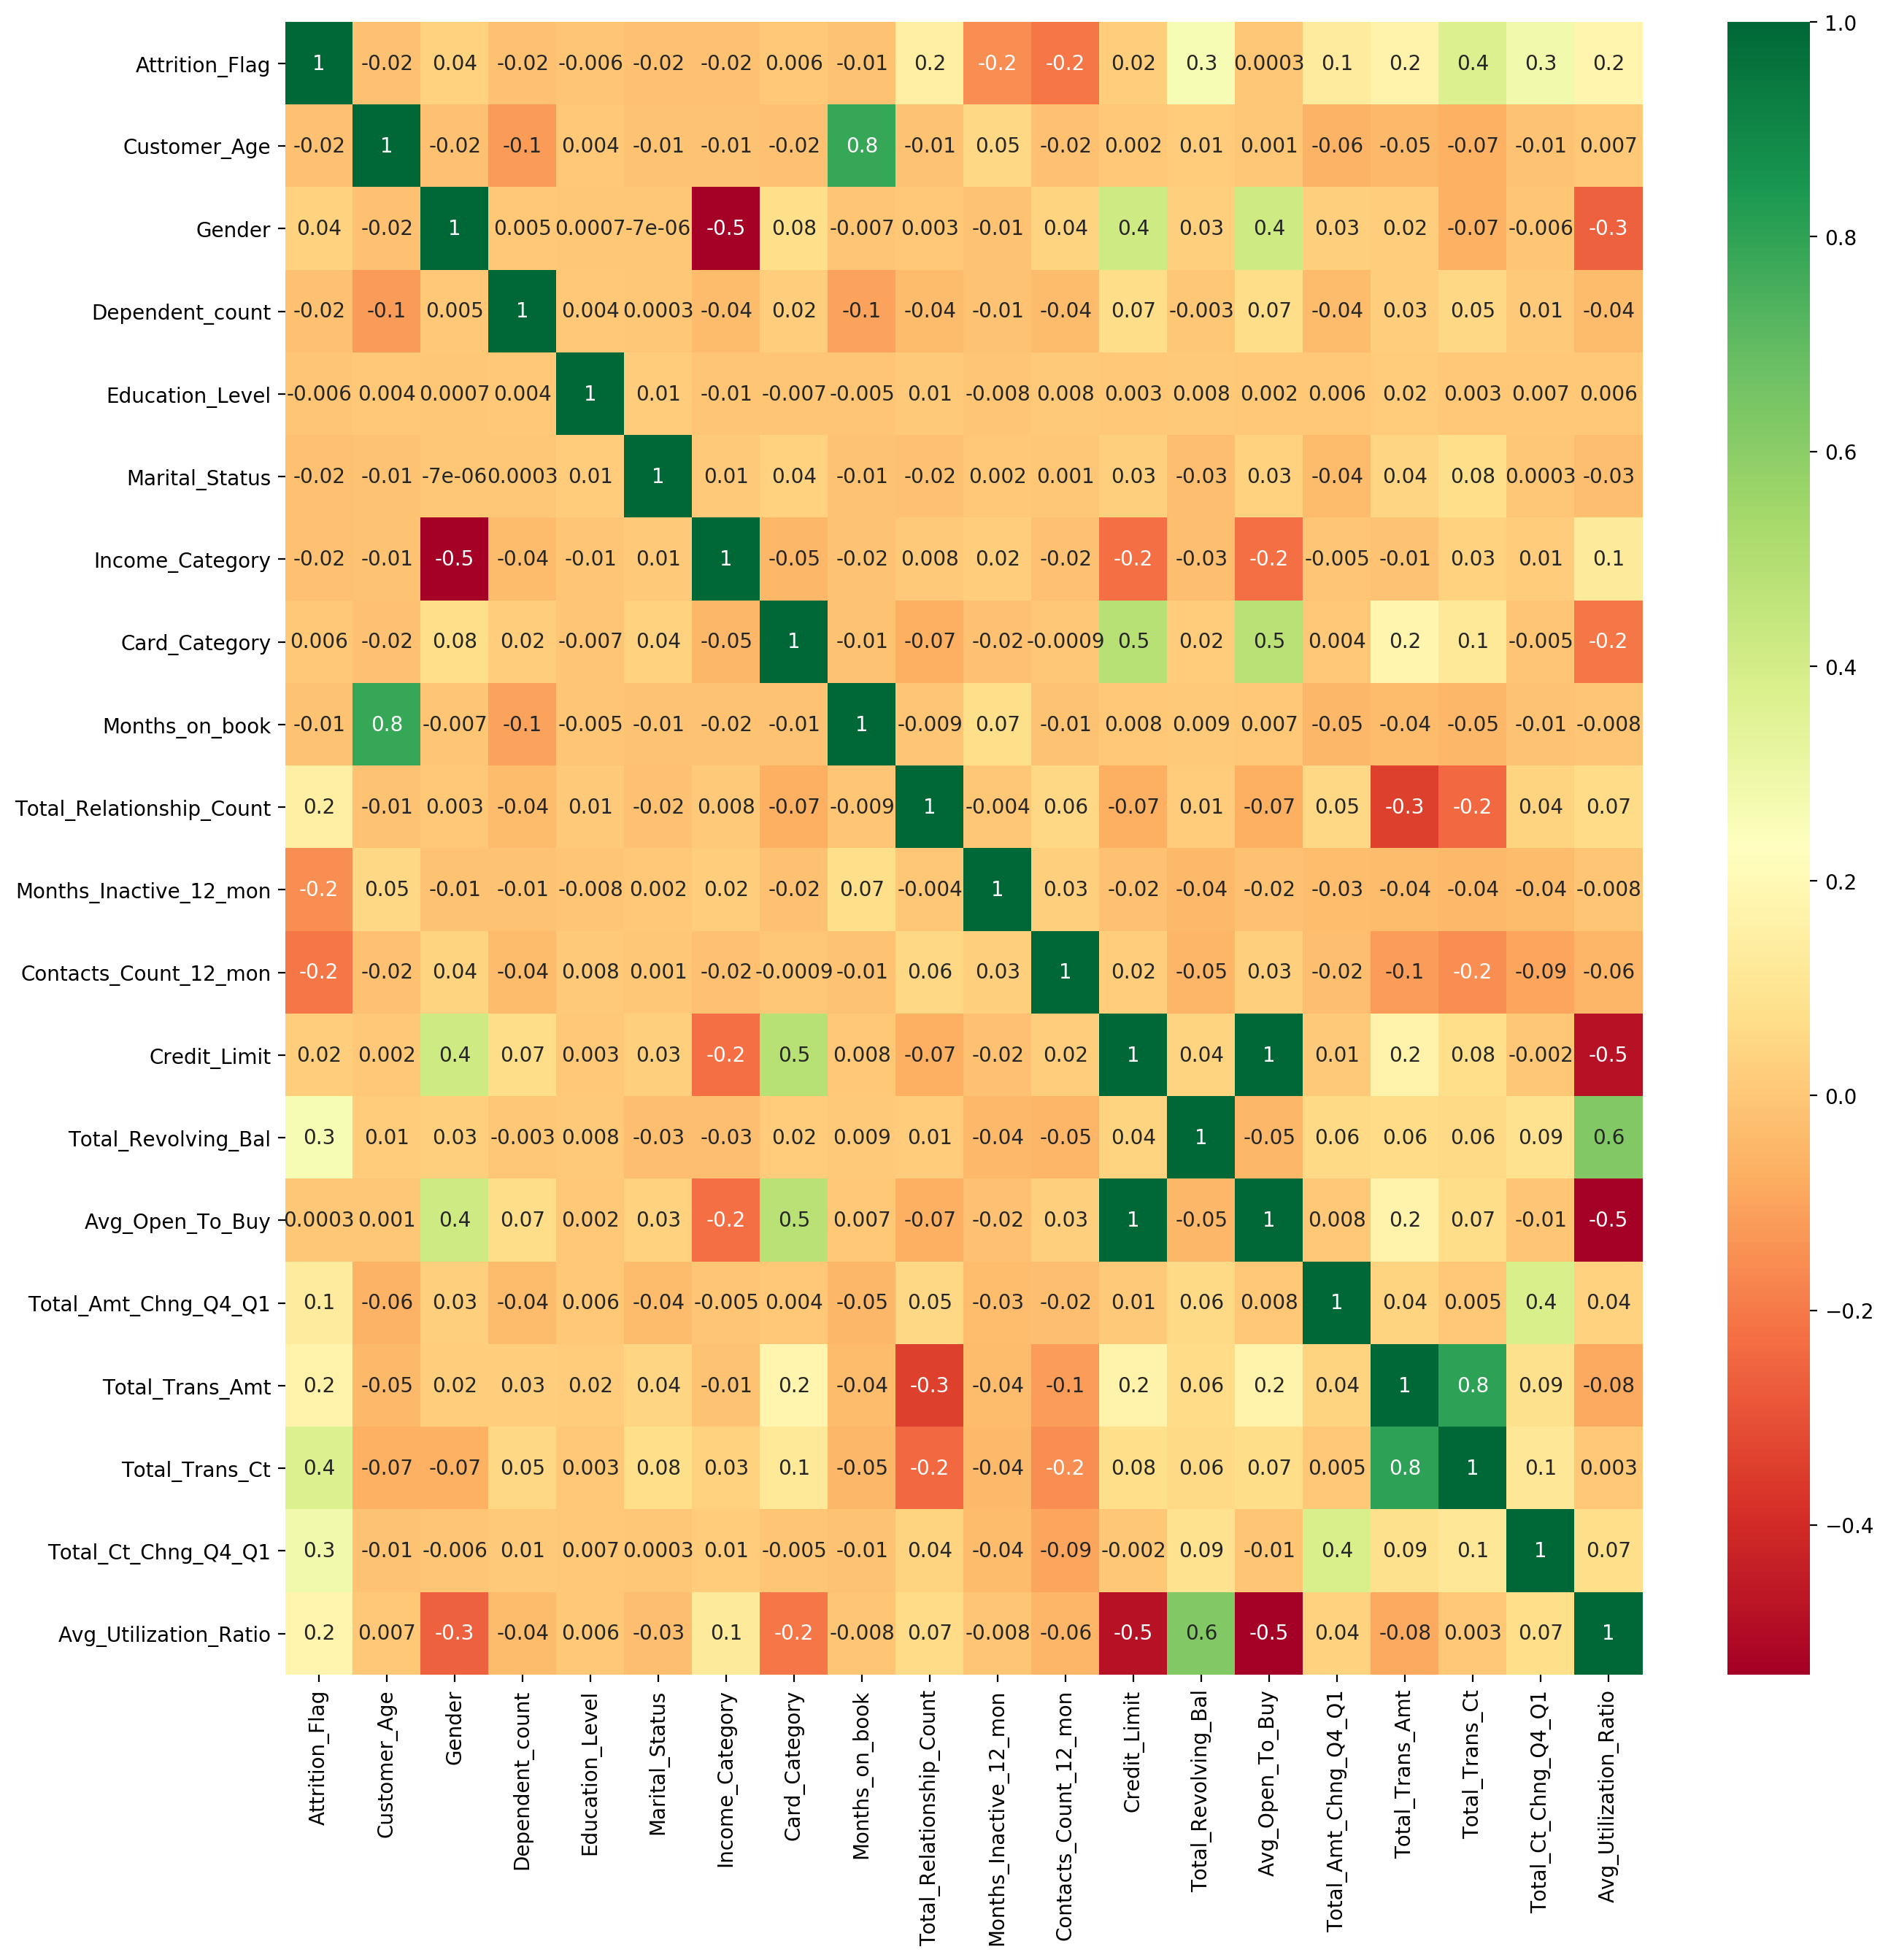

In [62]:
#plotting correlation heat map
X = newcreditP2.iloc[:,1:19]  #independent columns
y = newcreditP2.iloc[:,0]    #target column
#get correlations of each features in dataset
corrmat = newcreditP2.corr(method='pearson') #pearson method
top_corr_features = corrmat.index
plt.figure(figsize=(15,15), dpi=200)
#plot heat map
g=sns.heatmap(newcreditP2[top_corr_features].corr(),annot=True,fmt='.1g',cmap="RdYlGn")

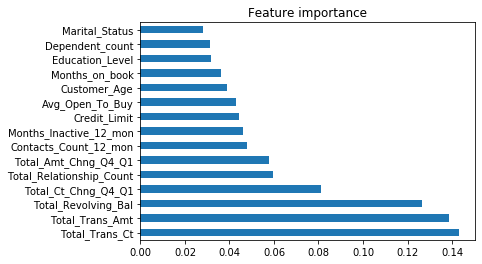

In [63]:
#Feature selection using extratreeclassifier: ensemble tree method
from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model = ExtraTreesClassifier(n_estimators = 10,criterion ='entropy',max_features = 2,random_state=9)
model.fit(X,y)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', title= 'Feature importance')
plt.show()

In [64]:
#viewing the numerical feature importance for extratree classifier
list(zip(X.columns, model.feature_importances_))

[('Customer_Age', 0.03886774711107431),
 ('Gender', 0.012297533038760352),
 ('Dependent_count', 0.0311392816220993),
 ('Education_Level', 0.03153898360192703),
 ('Marital_Status', 0.028063230707144882),
 ('Income_Category', 0.02603195453899007),
 ('Card_Category', 0.007343145019667252),
 ('Months_on_book', 0.03632197649813317),
 ('Total_Relationship_Count', 0.05975032958144029),
 ('Months_Inactive_12_mon', 0.045907272944733526),
 ('Contacts_Count_12_mon', 0.04801753342340329),
 ('Credit_Limit', 0.044220238647297815),
 ('Total_Revolving_Bal', 0.12642010678117083),
 ('Avg_Open_To_Buy', 0.04290489070505124),
 ('Total_Amt_Chng_Q4_Q1', 0.057979488911674315),
 ('Total_Trans_Amt', 0.13877957568288396),
 ('Total_Trans_Ct', 0.1432600631213036),
 ('Total_Ct_Chng_Q4_Q1', 0.08115664806324475)]

In [65]:
#duplicating the dataset
newcreditP3= newcreditP2.copy()
newcreditP3.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [66]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
#testing for multicorrelation
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [67]:
#defining column range 
vif1= newcreditP3.iloc[:,1:20]

In [68]:
calc_vif(vif1)

,variables,VIF
0,Customer_Age,77.332902
1,Gender,3.044755
2,Dependent_count,4.084367
3,Education_Level,3.768079
4,Marital_Status,4.836794
5,Income_Category,6.010507
6,Card_Category,1.450771
7,Months_on_book,56.465206
8,Total_Relationship_Count,7.604975
9,Months_Inactive_12_mon,6.157851


In [69]:
# dropping correlated values
newcreditP4=newcreditP3.drop(['Total_Trans_Amt','Gender','Customer_Age','Months_on_book','Avg_Open_To_Buy','Income_Category','Total_Amt_Chng_Q4_Q1'],axis=1)

In [70]:
newcreditP4.head()

,Attrition_Flag,Dependent_count,Education_Level,Marital_Status,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,3,3,1,0,5,1,3,12691.0,777,42,1.625,0.061
1,1,5,2,2,0,6,1,2,8256.0,864,33,3.714,0.105
2,1,3,2,1,0,4,1,0,3418.0,0,20,2.333,0.000
3,1,4,3,3,0,3,4,1,3313.0,2517,20,2.333,0.760
4,1,3,5,1,0,5,1,0,4716.0,0,28,2.500,0.000


In [71]:
#defining column range and calculating vif
P = newcreditP4.iloc[:,1:13]
calc_vif(P)

,variables,VIF
0,Dependent_count,4.026199
1,Education_Level,3.665261
2,Marital_Status,4.672653
3,Card_Category,1.409191
4,Total_Relationship_Count,6.221554
5,Months_Inactive_12_mon,5.577187
6,Contacts_Count_12_mon,5.185694
7,Credit_Limit,3.946540
8,Total_Revolving_Bal,6.691238
9,Total_Trans_Ct,7.689052


In [99]:
#selected features for prediction
Sdata= newcreditP3[['Dependent_count','Marital_Status','Education_Level','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',\
                            'Credit_Limit','Total_Revolving_Bal','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Attrition_Flag']]

### Test split and Smote oversampling 

In [100]:
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split
from collections import Counter

In [101]:
#defining for target and independent columns for split
A= Sdata.iloc[:,0:10]  #independent columns
B= Sdata.iloc[:,-1]    #target column

In [102]:
#viewing coloum x rows
A.shape,B.shape

((10127, 10), (10127,))

In [103]:
#split data with 80/20 ratio
A_train,A_test,B_train,B_test= train_test_split(A,B,test_size=0.2,stratify=y,random_state=134)

In [104]:
#result of data split
print("Number transactions A_train dataset: ", A_train.shape)
print("Number transactions B_train dataset: ", B_train.shape)
print("Number transactions A_test dataset: ", A_test.shape)
print("Number transactions B_test dataset: ", B_test.shape)

Number transactions A_train dataset:  (8101, 10)
Number transactions B_train dataset:  (8101,)
Number transactions A_test dataset:  (2026, 10)
Number transactions B_test dataset:  (2026,)


In [105]:
#defining SMOTE and its identifiers
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1001)

In [106]:
#smote oversampling
A_train_res, B_train_res = sm.fit_resample(A_train, B_train.ravel())
print('Resampled data {}'.format(Counter(B_train_res)))

Resampled data Counter({1: 6799, 0: 6799})


In [107]:
#result before and after oversampling
print('After OverSampling, the shape of train_A: {}'.format(A_train_res.shape)) 
print('After OverSampling, the shape of train_B: {} \n'.format(B_train_res.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(B_train== 1))) 
print("Before OverSampling, counts of label '0': {}\n".format(sum(B_train== 0))) 
  
print("After OverSampling, counts of label '1': {}".format(sum(B_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(B_train_res == 0))) 

After OverSampling, the shape of train_A: (13598, 10)
After OverSampling, the shape of train_B: (13598,) 

Before OverSampling, counts of label '1': 6799
Before OverSampling, counts of label '0': 1302

After OverSampling, counts of label '1': 6799
After OverSampling, counts of label '0': 6799


In [108]:
#creating df for oversampled data
df1=pd.DataFrame(A_train_res,columns=['Dependent_count','Marital_Status','Education_Level','Income_Category','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon',\
                            'Credit_Limit','Total_Revolving_Bal','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1'])
df2=pd.DataFrame(B_train_res,columns=['Attrition_Flag'])

In [109]:
# combined both df 
#Combined = [df1,df2]
smotedata = df1.combine_first(df2)

In [110]:
#converting to spark df
smotedf= spark.createDataFrame(smotedata)

In [115]:
#grouping oversampled data by target value
smotetarget =smotedf.groupby("Attrition_Flag").count().orderBy("count")
smotetarget.toPandas()

,Attrition_Flag,count
0,0.0,6799
1,1.0,6799



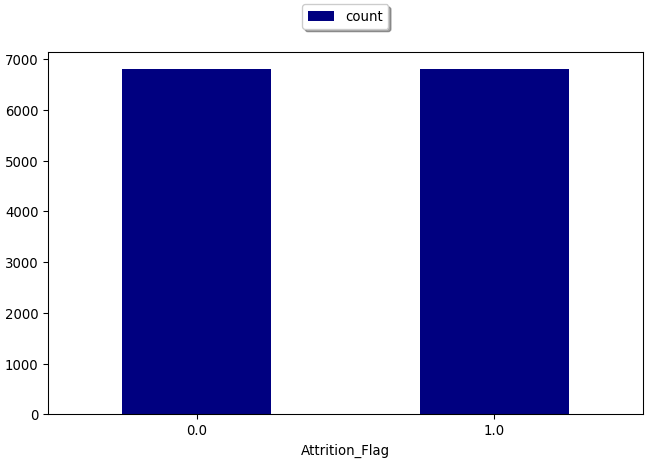

In [112]:
#Visualisation
display(smotetarget)

### Data Models

In [117]:
### libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


### LOGISTIC REGRESSION

In [86]:
# logistic regression cross validation with 5 kfolds
lr= LogisticRegression()
lrscore = cross_val_score(lr,A_train,B_train,cv=5)
lrsmotescore = cross_val_score(lr,A_train_res,B_train_res,cv=5)


In [87]:
## cross validation result for original data
lrscore

array([0.89636027, 0.89259259, 0.8845679 , 0.87839506, 0.88395062])

In [88]:
## cross validation result for oversampled data
lrsmotescore 

array([0.80330882, 0.77610294, 0.77205882, 0.77528503, 0.76057374])

In [89]:
## defining results in order to print results for hyper parameter tuning 
def print_results(results):
    print('BEST PARAMS:{}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stdd  = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stdd,results.cv_results_['params']):
        print('{} (+/-{}) for {}'. format(round(mean,3),round(std * 2,3),params))


In [90]:
##hyper parameter tuning 
parameters= {
        'solver':['liblinear','sag','saga','lbfgs'],
        'penalty':['l1','l2','elasticnet'],
        'C':[0.1,1,10] }
cv1= GridSearchCV(lr,parameters, cv=5)

In [91]:
## fit original data for tuning
cv1.fit(A_train,B_train)
print_results(cv1)

BEST PARAMS:{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

0.896 (+/-0.013) for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}
0.839 (+/-0.001) for {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.888 (+/-0.014) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.839 (+/-0.001) for {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.839 (+/-0.001) for {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.887 (+/-0.013) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.898 (+/-0.011) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1'

In [92]:
#cv2 overwrite cv1
## fit oversampled data for tuning 
cv2= GridSearchCV(lr,parameters, cv=5)
cv2.fit(A_train_res,B_train_res)
print_results(cv2)

BEST PARAMS:{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

0.838 (+/-0.028) for {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'sag'}
0.582 (+/-0.008) for {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'l1', 'solver': 'lbfgs'}
0.835 (+/-0.02) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.569 (+/-0.011) for {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.582 (+/-0.008) for {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.777 (+/-0.03) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'sag'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'saga'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
0.837 (+/-0.03) for {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
nan (+/-nan) for {'C': 1, 'penalty': 'l1',

In [93]:
##Logistic regression without SMOTE
model1 = LogisticRegression(random_state=101, penalty='l1',solver='liblinear',C=1.0)
model1.fit(A_train,B_train)
pred1 = model1.predict(A_test)
print('Accuracy ',accuracy_score(B_test,pred1))
print(classification_report(B_test,pred1))


Accuracy  0.8948667324777887
              precision    recall  f1-score   support

           0       0.78      0.48      0.59       325
           1       0.91      0.97      0.94      1701

    accuracy                           0.89      2026
   macro avg       0.84      0.73      0.77      2026
weighted avg       0.89      0.89      0.88      2026



In [94]:
## auc score for lr model without smote
auc_scorelr1 = roc_auc_score(B_test, pred1)
auc_scorelr1

0.7258219147108036

In [119]:
##Logistic regression with smote
model2 = LogisticRegression(random_state=102, C=0.1,penalty='l1', solver='liblinear' )
model2.fit(A_train_res,B_train_res.ravel())
pred2 = model2.predict(A_test)
print('Accuracy ',accuracy_score(B_test,pred2))
print(classification_report(B_test,pred2))


Accuracy  0.8297137216189536
              precision    recall  f1-score   support

           0       0.48      0.76      0.59       325
           1       0.95      0.84      0.89      1701

    accuracy                           0.83      2026
   macro avg       0.71      0.80      0.74      2026
weighted avg       0.87      0.83      0.84      2026



In [124]:
## auc score for lr model with smote
auc_scorelr2 = roc_auc_score(B_test, pred2)
auc_scorelr2

0.8027612716501605

#### DECISION TREE

In [99]:
# Decision tree cross validation with 5 kfolds
DT= DecisionTreeClassifier()
DTscore = cross_val_score(DT,A_train,B_train,cv=5)
DTsmotescore = cross_val_score(DT,A_train_res,B_train_res,cv=5)

In [100]:
#cross validation result for original data
DTscore

array([0.89944479, 0.88395062, 0.90555556, 0.87283951, 0.88024691])

In [101]:
# cross validation result for oversampled data
DTsmotescore

array([0.84154412, 0.89742647, 0.90919118, 0.89922766, 0.9025377 ])

In [102]:
##hyper parameter tuning 
parameters1= {
        'criterion':['gini','entropy'],
        'max_depth':[5,10,15,50, None]
         }

In [103]:
## fit original data for tuning 
DT1 = GridSearchCV(DT,parameters1, cv=5)
DT1.fit(A_train,B_train)
print_results(DT1)

BEST PARAMS:{'criterion': 'gini', 'max_depth': 5}

0.914 (+/-0.012) for {'criterion': 'gini', 'max_depth': 5}
0.902 (+/-0.021) for {'criterion': 'gini', 'max_depth': 10}
0.891 (+/-0.019) for {'criterion': 'gini', 'max_depth': 15}
0.89 (+/-0.022) for {'criterion': 'gini', 'max_depth': 50}
0.891 (+/-0.023) for {'criterion': 'gini', 'max_depth': None}
0.913 (+/-0.015) for {'criterion': 'entropy', 'max_depth': 5}
0.907 (+/-0.01) for {'criterion': 'entropy', 'max_depth': 10}
0.893 (+/-0.012) for {'criterion': 'entropy', 'max_depth': 15}
0.89 (+/-0.012) for {'criterion': 'entropy', 'max_depth': 50}
0.892 (+/-0.011) for {'criterion': 'entropy', 'max_depth': None}


In [104]:
#DT2 overwrite DT1
## fit oversampled data for tuning
DT2= GridSearchCV(DT,parameters1, cv=5)
DT2.fit(A_train_res,B_train_res)
print_results(DT2)

BEST PARAMS:{'criterion': 'entropy', 'max_depth': None}

0.865 (+/-0.03) for {'criterion': 'gini', 'max_depth': 5}
0.89 (+/-0.04) for {'criterion': 'gini', 'max_depth': 10}
0.891 (+/-0.044) for {'criterion': 'gini', 'max_depth': 15}
0.892 (+/-0.043) for {'criterion': 'gini', 'max_depth': 50}
0.892 (+/-0.048) for {'criterion': 'gini', 'max_depth': None}
0.865 (+/-0.03) for {'criterion': 'entropy', 'max_depth': 5}
0.887 (+/-0.047) for {'criterion': 'entropy', 'max_depth': 10}
0.896 (+/-0.047) for {'criterion': 'entropy', 'max_depth': 15}
0.9 (+/-0.052) for {'criterion': 'entropy', 'max_depth': 50}
0.902 (+/-0.046) for {'criterion': 'entropy', 'max_depth': None}


In [105]:
##Decision tree without SMOTE
model3 = DecisionTreeClassifier(random_state=103,criterion='gini',max_depth=5)
model3.fit(A_train,B_train)
pred3 = model3.predict(A_test)
print('Accuracy ',accuracy_score(B_test,pred3))
print(classification_report(B_test,pred3))

Accuracy  0.9106614017769002
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       325
           1       0.94      0.96      0.95      1701

    accuracy                           0.91      2026
   macro avg       0.84      0.81      0.83      2026
weighted avg       0.91      0.91      0.91      2026



In [106]:
## auc score original data
auc_scoredt1 = roc_auc_score(B_test, pred3)
auc_scoredt1

0.8098991543435988

In [120]:
##Decision tree with SMOTE
model4 = DecisionTreeClassifier(random_state=114,criterion='entropy',max_depth=None)
model4.fit(A_train_res,B_train_res.ravel())
pred4 = model4.predict(A_test)
print('Accuracy ',accuracy_score(B_test,pred4))
print(classification_report(B_test,pred4))

Accuracy  0.8780848963474828
              precision    recall  f1-score   support

           0       0.60      0.75      0.66       325
           1       0.95      0.90      0.93      1701

    accuracy                           0.88      2026
   macro avg       0.77      0.83      0.79      2026
weighted avg       0.89      0.88      0.88      2026



In [123]:
## auc score oversampled data
auc_scoredt2 = roc_auc_score(B_test, pred4)
auc_scoredt2

0.8265897888120111

### RANDOM FOREST 

In [111]:
# Random forest cross validation with 5 kfolds
RF= RandomForestClassifier()
RFscore = cross_val_score(RF,A_train,B_train,cv=5)
RFsmotescore = cross_val_score(RF,A_train_res,B_train_res,cv=5)

In [112]:
#cross validation results for original data
RFscore 

array([0.92782233, 0.93641975, 0.92407407, 0.92407407, 0.92962963])

In [113]:
#cross validation results for oversampled data
RFsmotescore

array([0.88235294, 0.94264706, 0.95404412, 0.93710923, 0.94520044])

In [114]:
##hyper parameter tuning 
parameters2= {
        'criterion':['gini','entropy'],
        'n_estimators':[5,50,100],
        'max_depth':[2,10,20, None]
         }

In [115]:
#fit original data for tuning
RF1 = GridSearchCV(RF,parameters2, cv=5)
RF1.fit(A_train,B_train)
print_results(RF1)

BEST PARAMS:{'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}

0.865 (+/-0.026) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5}
0.865 (+/-0.009) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}
0.873 (+/-0.016) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.922 (+/-0.014) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 5}
0.927 (+/-0.013) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
0.927 (+/-0.009) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
0.915 (+/-0.007) for {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 5}
0.929 (+/-0.01) for {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}
0.93 (+/-0.009) for {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
0.916 (+/-0.008) for {'criterion': 'gini', 'max_depth': None, 'n_estimators': 5}
0.93 (+/-0.012) for {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
0.93 (+/-0.01) for {'criterion': 'gini', 'max_dep

In [116]:
## RF2 overwrites RF1
## fit oversampled data for tuning 
RF2= GridSearchCV(RF,parameters2, cv=5)
RF2.fit(A_train_res,B_train_res)
print_results(RF2)

BEST PARAMS:{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 50}

0.815 (+/-0.029) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 5}
0.843 (+/-0.02) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 50}
0.845 (+/-0.023) for {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}
0.905 (+/-0.053) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 5}
0.916 (+/-0.057) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
0.917 (+/-0.055) for {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 100}
0.915 (+/-0.057) for {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 5}
0.93 (+/-0.054) for {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 50}
0.932 (+/-0.052) for {'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
0.911 (+/-0.064) for {'criterion': 'gini', 'max_depth': None, 'n_estimators': 5}
0.931 (+/-0.052) for {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
0.933 (+/-0.049) for {'criterion': 'gini', 'm

In [139]:
##RandomForest without SMOTE
model5 = RandomForestClassifier(random_state=105,criterion='gini',max_depth= None,n_estimators= 50)
model5.fit(A_train,B_train)
pred5 = model5.predict(A_test)
print('Accuracy ',accuracy_score(B_test,pred5))
print(classification_report(B_test,pred5))

Accuracy  0.926949654491609
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       325
           1       0.94      0.97      0.96      1701

    accuracy                           0.93      2026
   macro avg       0.89      0.83      0.85      2026
weighted avg       0.92      0.93      0.92      2026



In [140]:
## auc score without smote
auc_scorerf1 = roc_auc_score(B_test, pred5)
auc_scorerf1

0.8258219147108037

In [121]:
##RandomForest tree with SMOTE
model6 = RandomForestClassifier(random_state=106,criterion='entropy',max_depth= None,n_estimators= 50)
model6.fit(A_train_res,B_train_res.ravel())
pred6 = model6.predict(A_test)
print('Accuracy ',accuracy_score(B_test,pred6))
print(classification_report(B_test,pred6))

Accuracy  0.9032576505429417
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       325
           1       0.96      0.92      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.81      0.86      0.83      2026
weighted avg       0.91      0.90      0.91      2026



In [122]:
## auc score with smote
auc_scorerf2 = roc_auc_score(B_test, pred6)
auc_scorerf2

0.8590042056708723

In [122]:
#determing the most significant features with the best model
m6=list(zip(A.columns,model6.feature_importances_))
sorted(m6)

[('Contacts_Count_12_mon', 0.03531950076973608),
 ('Credit_Limit', 0.0853239993714238),
 ('Dependent_count', 0.02730890765219706),
 ('Education_Level', 0.03035303434598938),
 ('Marital_Status', 0.01569209456159687),
 ('Months_Inactive_12_mon', 0.03613555080029981),
 ('Total_Ct_Chng_Q4_Q1', 0.1545036037430561),
 ('Total_Relationship_Count', 0.09888169119997642),
 ('Total_Revolving_Bal', 0.1923294587940689),
 ('Total_Trans_Ct', 0.32415215876165565)]

### MLP CLASSIFIER

In [128]:
## duplicate the train and test data for standardising
## Target variable is not standardise because it produces a negative value
A_train1= A_train.copy()
A_train2 =A_train_res.copy()
A_test1 = A_test.copy()

In [129]:
#libraries
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [130]:
#standarise values
A_trainO=sc.fit_transform(A_train1)
A_trainS= sc.fit_transform(A_train2)
A_test2= sc.transform(A_test1)

In [126]:
# MLP cross validation with 5 kfolds
MLP= MLPClassifier()
MLPscore = cross_val_score(MLP,A_trainO,B_train,cv=5)
MLPsmotescore = cross_val_score(MLP,A_trainS,B_train_res,cv=5)

In [127]:
#cross validation results for original data
MLPscore

array([0.91795188, 0.92530864, 0.92530864, 0.9117284 , 0.92469136])

In [128]:
#cross validation results for oversampled data
MLPsmotescore

array([0.83639706, 0.91727941, 0.91911765, 0.91504229, 0.92055903])

In [129]:
##hyper parameter tuning 
parameters3= {
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant','adaptive']
         }

In [130]:
## TUNING TAKES A LONG PERIOD
#fit original data
MLP1 = GridSearchCV(MLP,parameters3, cv=5)
MLP1.fit(A_trainO,B_train)
print_results(MLP1)

BEST PARAMS:{'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}

0.899 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}
0.921 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}
0.898 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.919 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.899 (+/-0.012) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'sgd'}
0.923 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
0.898 (+/-0.013) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.922 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.909 (+/-0.013) for {'activation': 'relu', 'alpha

In [131]:
## TUNING TAKES A LONG PERIOD
## MLP2 overwrites MLP1
#fit oversampled data
MLP2 = GridSearchCV(MLP,parameters3, cv=5)
MLP2.fit(A_trainS,B_train_res)
print_results(MLP2)

BEST PARAMS:{'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'adam'}

0.842 (+/-0.039) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'sgd'}
0.906 (+/-0.062) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}
0.844 (+/-0.035) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.908 (+/-0.053) for {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.838 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'sgd'}
0.906 (+/-0.052) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'constant', 'solver': 'adam'}
0.839 (+/-0.031) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.905 (+/-0.052) for {'activation': 'tanh', 'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.887 (+/-0.045) for {'activation': 'relu', 'alp

In [134]:
##MLP tree without SMOTE
model7 = MLPClassifier(random_state=181,activation ='tanh', alpha=0.05, learning_rate='constant', solver ='adam')
model7.fit(A_trainO,B_train)
pred7 = model7.predict(A_test2)
print('Accuracy ',accuracy_score(B_test,pred7))
print(classification_report(B_test,pred7))

Accuracy  0.910167818361303
              precision    recall  f1-score   support

           0       0.88      0.51      0.65       325
           1       0.91      0.99      0.95      1701

    accuracy                           0.91      2026
   macro avg       0.90      0.75      0.80      2026
weighted avg       0.91      0.91      0.90      2026



In [135]:
## auc score original data
auc_scoremlp1 = roc_auc_score(B_test, pred7)
auc_scoremlp1

0.7486238864016642

In [131]:
##MLP tree tree with SMOTE
model8 = MLPClassifier(random_state=195,activation= 'tanh', alpha= 0.0001, learning_rate= 'adaptive', solver ='adam')
model8.fit(A_trainS,B_train_res.ravel())
pred8 = model8.predict(A_test2)
print('Accuracy ',accuracy_score(B_test,pred8))
print(classification_report(B_test,pred8))

Accuracy  0.8869693978282329
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       325
           1       0.96      0.91      0.93      1701

    accuracy                           0.89      2026
   macro avg       0.79      0.84      0.81      2026
weighted avg       0.90      0.89      0.89      2026



In [132]:
## auc score smote data
auc_scoremlp2 = roc_auc_score(B_test, pred8)
auc_scoremlp2

0.8430814453036675

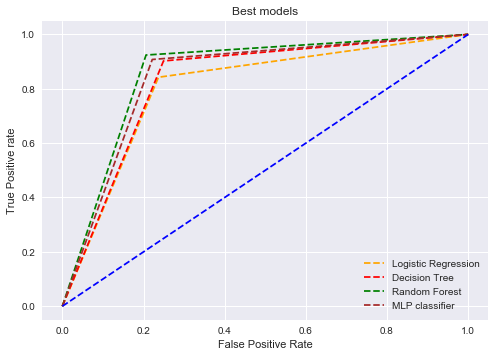

In [133]:
# Plotting auc curve for the best models 
plt.style.use('seaborn')

fpr2, tpr2, thresh2 = roc_curve(B_test, pred2) #lR
fpr4, tpr4, thresh4 = roc_curve(B_test, pred4) #DT
fpr6, tpr6, thresh6 = roc_curve(B_test, pred6) #RF
fpr8, tpr8, thresh8 = roc_curve(B_test, pred8) #MLP
random_probs = [0 for i in range(len(B_test))]
p_fpr, p_tpr, _ = roc_curve(B_test, random_probs)

plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr6, tpr6, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr8, tpr8, linestyle='--',color='brown', label='MLP classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Best models')
plt.legend(loc='best')
plt.show()

In [ ]:
end.